# Problem Statement

Build an optimal model that can help us identify bot traffic coming  from search engines i.e non-human traffic(NHT) and human traffic (HT).

# 1)-Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [0]:
# For data processing and maths
import numpy as np
import pandas as pd
import re
import requests
import pickle

In [0]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# For neural net

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [0]:
# for evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2)-Loading data

Pickle file generated from EDA notebook

In [0]:
df = pd.read_pickle('clickdata.pkl')
df.head()

,labels,visitor_recognition_type,country_by_ip_address,region_by_ip_address
0,NHT,ANONYMOUS,US,CA
1,NHT,ANONYMOUS,US,CA
2,HT,ANONYMOUS,IT,LI
3,NHT,ANONYMOUS,US,CA
4,NHT,ANONYMOUS,US,CA


In [0]:
df.shape

(59638, 4)

In [0]:
df.labels.value_counts()

HT     38497
NHT    21141
Name: labels, dtype: int64

In [0]:
n_group = df['labels'].value_counts()
n_group_sum = n_group.sum()

print('Human Traffic: {}'.format(n_group[0]))
print('Non-Human Traffic: {}'.format(n_group[1]))

print('percentage of Human Traffic: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('percentage of Non-Human Traffic: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

Human Traffic: 38497
Non-Human Traffic: 21141
percentage of Human Traffic: 64.55 %
percentage of Non-Human Traffic: 35.45 %


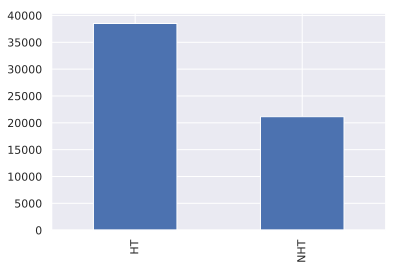

In [0]:
df['labels'].value_counts().plot.bar()

### 2a)- Encoding target feature

- NHT i.e bot is taken as 1
- Human traffic HT is taken as 0



In [0]:
df['labels'] = df.labels.map({'HT':'0', 'NHT':'1'})

In [0]:
df.head()

,labels,visitor_recognition_type,country_by_ip_address,region_by_ip_address
0,1,ANONYMOUS,US,CA
1,1,ANONYMOUS,US,CA
2,0,ANONYMOUS,IT,LI
3,1,ANONYMOUS,US,CA
4,1,ANONYMOUS,US,CA


### 2b)-Encoding all categorical features


In [0]:
df_dummy=pd.get_dummies(data=df[['country_by_ip_address', 'region_by_ip_address', 'visitor_recognition_type']], drop_first=True, dummy_na=True)

In [0]:
df_dummy.shape

(59638, 296)

**Split into target and input data i.e X and y**

In [0]:
X = pd.get_dummies(data=df[['country_by_ip_address', 'region_by_ip_address', 'visitor_recognition_type']], drop_first=True,dummy_na=True)
y = df.labels

In [0]:
print(y.shape)
print(X.shape)

(59638,)
(59638, 296)


### Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2019)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47710, 296)
(11928, 296)
(47710,)
(11928,)


# 3)-ML Models

- Logistic Classification Model
- Naive Bayes Classification Model
- K-Nearest Neighbor Classification Model
- Decision Tree Classification Model
- Random Forest Classification Model 
- Support Vector Classification Model

In [0]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [0]:
# Using k-Fold
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.9801509117585411
NB 0.973841961852861
KNN 0.975372039404737
DT 0.980528191154894
RF 0.9804443512890378
SVM 0.9777614755816391


Decision Tree performs best on training data with 98.05 accuracy slightly higher than Random Forest.

**How about test data?**

In [0]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.9800474805492894
NB 0.9708254105323562
KNN 0.9797960136590964
DT 0.9807181292438554
RF 0.9808857738373172
SVM 0.9699032246268782


Again with a small margin is seen between Decision Tree and Random Forest. Who's ultimate winner? Let me check how spread accuarcy is? 

[Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

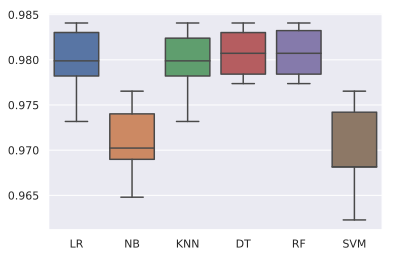

In [0]:
ax = sns.boxplot(data=results)
figsize=(16, 7)
ax.set_xticklabels(names)

Accuracy spead for DT and RF is almost same. Let's try "mighty" neural network and see if it could beat em?

# 4)- applying neural network

In [0]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                4455      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 4,712
Trainable params: 4,712
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import ModelCheckpoint
filename = 'model.h1' 

# set checkpoint
checkpoint = ModelCheckpoint(filename, monitor='val_acc',  
                             verbose=1, save_best_only=True, 
                             mode='min')

In [0]:
# call the function to fit to the data (training the network)
history=model.fit(X_train, y_train, epochs = 15,callbacks=[checkpoint], batch_size=20, validation_data=(X_test, y_test))

Train on 47710 samples, validate on 11928 samples
Epoch 1/15
47710/47710 [==============================] - 15s 307us/step - loss: 0.1188 - acc: 0.9672 - val_loss: 0.0721 - val_acc: 0.9783

Epoch 00001: val_acc improved from inf to 0.97829, saving model to model.h1
Epoch 2/15
47710/47710 [==============================] - 14s 288us/step - loss: 0.0776 - acc: 0.9790 - val_loss: 0.0713 - val_acc: 0.9811

Epoch 00002: val_acc did not improve from 0.97829
Epoch 3/15
47710/47710 [==============================] - 14s 286us/step - loss: 0.0749 - acc: 0.9791 - val_loss: 0.0727 - val_acc: 0.9774

Epoch 00003: val_acc improved from 0.97829 to 0.97745, saving model to model.h1
Epoch 4/15
47710/47710 [==============================] - 14s 285us/step - loss: 0.0740 - acc: 0.9791 - val_loss: 0.0711 - val_acc: 0.9811

Epoch 00004: val_acc did not improve from 0.97745
Epoch 5/15
47710/47710 [==============================] - 14s 287us/step - loss: 0.0729 - acc: 0.9789 - val_loss: 0.0709 - val_acc: 0.

In [0]:
y_pred_keras = model.predict(X_test)

In [0]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

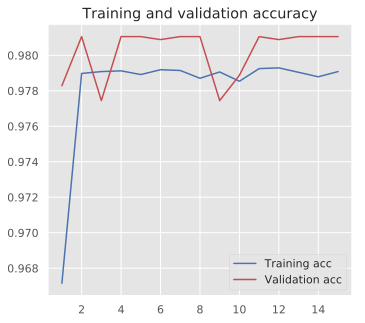

In [0]:
plot_history(history)

Although Neural Network is giving best accuracy results yet these results are not that consistent. There is no overfitting which is positive thing. In my opinion, this data is pretty simple and straight forward and it will be nice to use a simpler model that may give us optimal results. Please notice I said optimal results, not best results.

That's why I will apply Decision Tree as it is almost on par with Random Forest with accuracy of 98.07%. For some decimal difference, it is not wise to use more complicated and time consuming models like Random Forest or XG Boost or even Neural Network. I believe that tuning decision tree might give us desired results.

# 5)- Model Tunning

Adding more estimators, and playing with parameters

-class_weight: all classes are supposed to have weight one if NONE given


I came up with better accuracy

In [0]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# setup parameters
param_dist={ "max_depth" : [3, None],
            "min_samples_leaf" : randint(1,9),
            "criterion": ["gini","entropy"]
           }

In [0]:
# instantiate a decision tree
tree= DecisionTreeClassifier()

# instantiate RandomizedSearchCV

tree_cv=RandomizedSearchCV(tree, param_dist, cv=5)



In [0]:
# fit on data
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [0]:
# print tuned parameters and score

print("Tuned Decision Tree Parameters:{}".format(tree_cv.best_params_))
print("Best Score:{}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters:{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
Best Score:0.9804024313561098


In [0]:
tree_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred_randomsearch=tree_cv.predict(X_test)

### 5.1)-confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Key matrix elements are:

- true positives (TP): These are cases in which we predicted yes (bot traffic), and actually they do have bot traffic i.e non-human.
- true negatives (TN): We predicted non-bot search traffic,actually they were.
- false positives (FP): We predicted bot traffic, but actually they were human generated traffic. (Also known as a "Type I error.")
- false negatives (FN): We predicted human traffic i.e non-bot, but they actually were bots. (Also known as a "Type II error.")

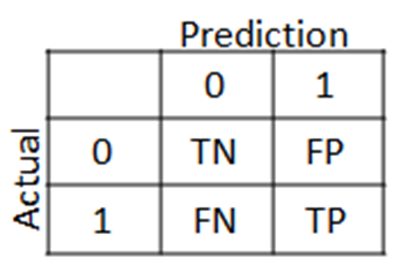

In [1]:
from IPython.display import Image
Image("cm.png")

In [0]:
import itertools
from sklearn import metrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cm = confusion_matrix(y_test, y_pred_randomsearch)
cm

array([[7522,  199],
       [  27, 4180]])

In [0]:
#save confusion matrix and slice into four piece
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

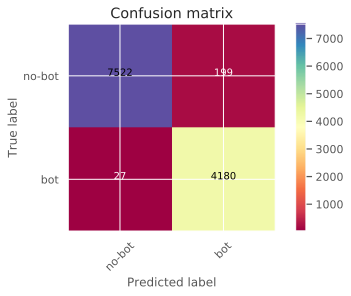

In [0]:
# False=0; True=1 ====> no-bot=0, bot=1
plot_confusion_matrix(cm, classes=['no-bot', 'bot'])

### Classification Report

In [0]:
print(classification_report(y_test,y_pred_randomsearch))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7721
           1       0.95      0.99      0.97      4207

    accuracy                           0.98     11928
   macro avg       0.98      0.98      0.98     11928
weighted avg       0.98      0.98      0.98     11928



**We can see if we want to predict NHT(encoded as 1) then recall is the most feasible evaluation metric. On other side, if we want to see human traffic(encoded as 0) then precision is better evaluation metric. In either case, accuracy only provides a sense how well model is doing in overall prediction. But, if we need to know what classification category is of our interest then we better go deeper**

# 6)-Matrics evaluation

### a)-Classification Accuracy
Overall, how often is the classifier correct?

- ratio of correctly predicted observation to the total observations

In [0]:
print(accuracy_score(y_test, y_pred_randomsearch))

0.9810529845741114


In [0]:
print((TP + TN) / float(TP + TN + FP + FN))

0.9810529845741114


So we got improved accuracy that neural network was giving us. Now it is 98.10% with less time and less computing. But, is accuracy right matrics for evaluation?

### b)-Classification Error
Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate

In [0]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_randomsearch))

0.018947015425888666
0.018947015425888614


Let's see what are other options we have in our bag !

### c)-Other matrices
- Sensitivity
- Specificity
- False Positive Rate
- Precision

### Sensitivity
When the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"

In [0]:
from sklearn.metrics import precision_score, recall_score, make_scorer
recall_scorer = make_scorer(recall_score, pos_label='bot')

In [0]:
#print(recall_score(y_test, y_pred_randomsearch))
print(TP / float(TP + FN))

0.9935821250297124


**I think "Sensitivity" i.e detection of bot traffic is a better evaluation metric for our problem.**

### Specificity
When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances?

In [0]:
print(TN / float(TN + FP))

0.9742261365108147


### False Positive Rate
When the actual value is negative, how often is the prediction incorrect?

In [0]:
print(FP / float(TN + FP))

0.02577386348918534


### Precision
When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [0]:
print(TP / float(TP + FP))
#print(metrics.precision_score(y_test, y_pred_randomsearch))

0.9545558346654487


# 7)-Adjusting the classification threshold

In [0]:
# print the first 10 predicted responses
tree_cv.predict(X_test)[0:10]

array(['1', '0', '1', '0', '0', '0', '1', '0', '1', '1'], dtype=object)

In [0]:
y_pred_randomsearch[:10]

array(['1', '0', '1', '0', '0', '0', '1', '0', '1', '1'], dtype=object)

**predict_proba**

In [0]:
# print the first 10 predicted probabilities of class membership. 0 for HT and 1 for NHT
tree_cv.predict_proba(X_test)[0:10, :]

array([[3.25025772e-02, 9.67497423e-01],
       [1.00000000e+00, 0.00000000e+00],
       [3.25025772e-02, 9.67497423e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.25025772e-02, 9.67497423e-01],
       [9.99772727e-01, 2.27272727e-04],
       [3.25025772e-02, 9.67497423e-01],
       [3.80710660e-01, 6.19289340e-01]])

In [0]:
# print the first 10 predicted probabilities for class 1 i.e NHT
tree_cv.predict_proba(X_test)[0:10, 1]

array([9.67497423e-01, 0.00000000e+00, 9.67497423e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.67497423e-01, 2.27272727e-04,
       9.67497423e-01, 6.19289340e-01])

In [0]:
pred_prob_cl_one = tree_cv.predict_proba(X_test)[:, 1]
print(pred_prob_cl_one[:5])

[0.96749742 0.         0.96749742 0.         0.        ]


Text(0, 0.5, 'Frequency')

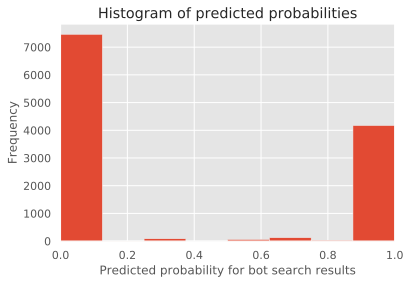

In [0]:
# histogram of predicted probabilities for bot traffic
plt.hist(pred_prob_cl_one, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for bot search results')
plt.ylabel('Frequency')

If we want to go further in detail about how well we have predicted non-human traffic then we may change our threshold upto 0.9 to get better results. On other hand, we can get more precise results by moving threshold to lower value of 0.1 for getting better prediction of human traffic.For this model, we have already got very good results for both human and non-human traffic. With adding more data, we might re-check if our model would keep performing that well and if we want to make few changes to get better results either for HT or NHT.

### Threshold value changing
For predicting bot search pattern in order to improve the Specificity of the classifier.

As per my assumption, False positive (bot traffic are predicted as bot traffic incorrectly) matters more to us as we want to have imporoved stats for bot traffic. On other hand, False negative(human traffic are predicted incorrectly as bot traffic) is of less concern.

We need a classifer that is more specific for bot traffic and less sensitive towards human generated traffic.

In [0]:
from sklearn.preprocessing import binarize
y_pred_class_spec = binarize([pred_prob_cl_one], 0.9)[0]

In [0]:
y_pred_class_spec[0:10]

In [0]:
# check original confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_randomsearch))

In [0]:
# new confusion matrix (threshold of 0.9)
print(metrics.confusion_matrix(y_test, y_pred_class_spec))

In [0]:
# check value of  new specificity
print(TN / float(TN + FP))

In [0]:
# sensitivity new one
print(recall_score(y_test, y_pred_class_spec))

In [0]:
# Precison new
print(metrics.precision_score(y_test, y_pred_class_spec))

### ROC Curve

In [0]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_cl_one)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for bot traffic')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [0]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [0]:
evaluate_threshold(0.5)

In [0]:
evaluate_threshold(0.9)

In [0]:
print(classification_report(y_test, y_pred_class_spec))

### AUC
AUC is the percentage of the ROC plot that is underneath the curve:

In [0]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, pred_prob_cl_one))

In [0]:
from sklearn.metrics import auc
auc(fpr, tpr)

- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- Greater value close to 1 is better. If lower value i.e 0.5 then it is random guessing. In our case, it is good value

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl_one)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)